In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
crime_df = pd.read_parquet('../../data/02_processed_data/04_crime_data/canada_and_province_crime_data.parquet')

In [60]:
crime_df.head()

,year,GEO,DGUID,violation,Violation Code,Statistics,UOM,value
0,1998,Canada,2021A000011124,"Total, all violations",0,Actual incidents,Number,2688540.00
1,1998,Canada,2021A000011124,"Total, all violations",0,"Rate per 100,000 population",Rate,8915.12
2,1998,Canada,2021A000011124,"Total, all violations",0,Percentage contribution to the Crime Severity ...,Percent,100.00
3,1998,Canada,2021A000011124,"Total, all violations",0,Total cleared,Number,1073453.00
4,1998,Canada,2021A000011124,"Total, all violations",0,Cleared by charge,Number,705133.00


In [61]:
# Summary statistics
print("=== CRIME DATA SUMMARY STATISTICS ===\n")
print(f"Total records: {len(incidents):,}")
print(f"Year range: {incidents['year'].min()} - {incidents['year'].max()}")
print(f"Number of locations: {incidents['location'].nunique()}")
print(f"Number of violation types: {incidents['violation'].nunique()}")
print(f"\nValue statistics (Actual incidents only):")
actual_incidents = incidents[incidents['Statistics'] == 'Actual incidents']
print(actual_incidents['value'].describe())

=== CRIME DATA SUMMARY STATISTICS ===

Total records: 326,624
Year range: 1998 - 2024
Number of locations: 57
Number of violation types: 311

Value statistics (Actual incidents only):
count    3.266240e+05
mean     2.917365e+03
std      4.385372e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      6.900000e+01
max      2.699428e+06
Name: value, dtype: float64


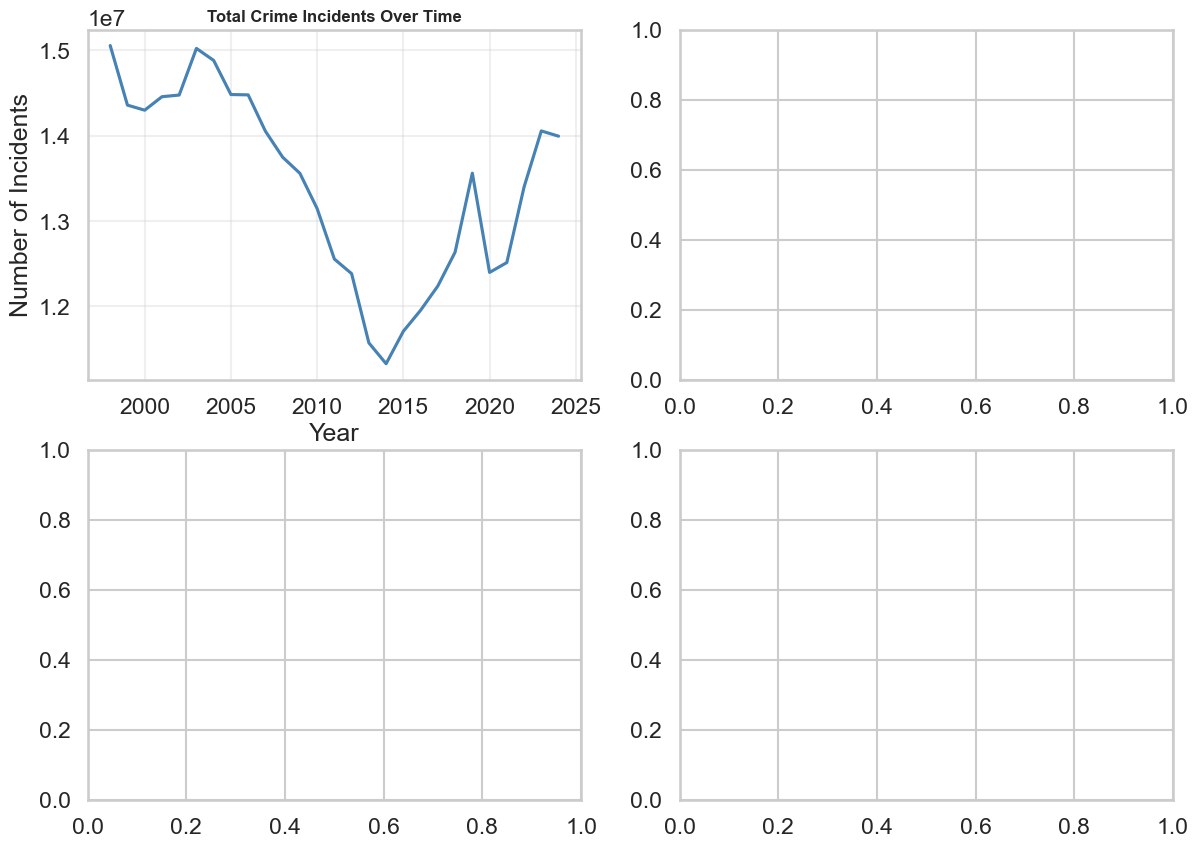

In [62]:
# Aggregate yearly data for Canada
yearly = incidents[(incidents['location'] == 'Canada') & 
                   (incidents['Statistics'] == 'Actual incidents')].groupby('year')['value'].sum().reset_index()

# Crime trends over time
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Total crimes by year
yearly.plot(x='year', y='value', ax=axes[0, 0], kind='line', legend=False, color='steelblue')
axes[0, 0].set_title('Total Crime Incidents Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Incidents')
axes[0, 0].grid(True, alpha=0.3)

In [63]:
# 2. Top violations
top_violations.head(10).plot(ax=axes[0, 1], kind='barh', color='coral')
axes[0, 1].set_title('Top 10 Violation Types', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Incidents')

Text(0.5, 424.4444444444445, 'Total Incidents')

In [64]:
# 3. Top locations
loc_totals.head(10).plot(ax=axes[1, 0], kind='barh', color='lightgreen')
axes[1, 0].set_title('Top 10 Locations by Crime Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Incidents')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [65]:
# 4. Crimes by province
pivot_province['Total, all violations'].plot(ax=axes[1, 1], kind='bar', color='mediumpurple')
axes[1, 1].set_title('Total Violations by Province', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Total Incidents')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

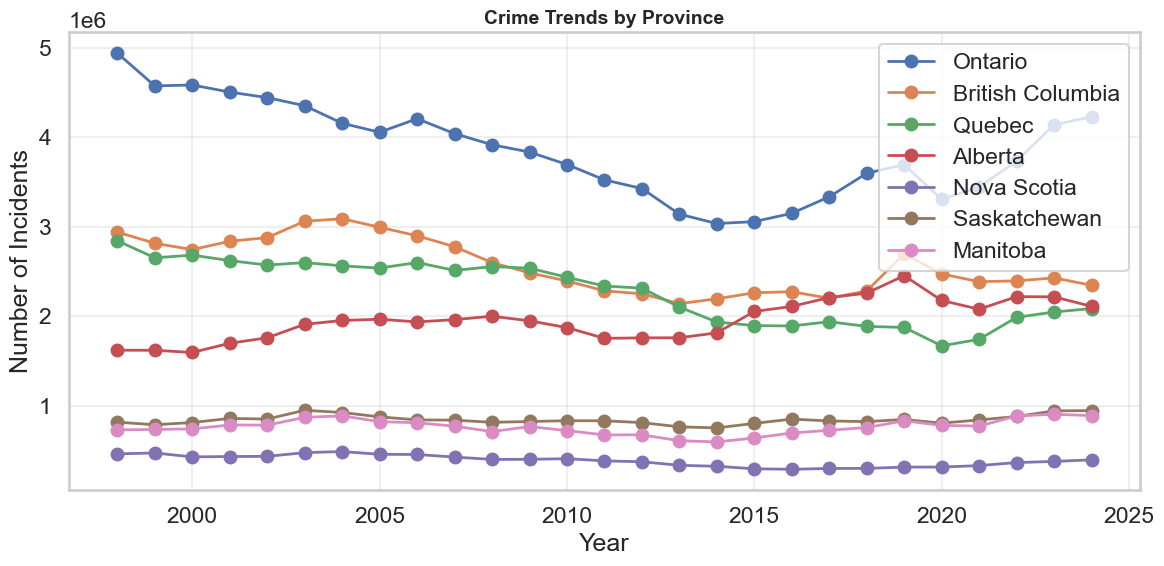

In [66]:
# Crime trends by top provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in province_list:
    province_data = incidents[(incidents['location'] == province) & 
                              (incidents['Statistics'] == 'Actual incidents')].groupby('year')['value'].sum()
    ax.plot(province_data.index, province_data.values, marker='o', label=province, linewidth=2)

ax.set_title('Crime Trends by Province', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()